# Text vectorization and term frequency analysis

In the previous notebook, 'jneuro.csv' was imported, cleaned and saved as 'jneuro_clean.csv'.
Here, we'll use nltk library to normalize the preprocessed text. Then, we will vectorize the texts parsed by its publiation year using scikit-learn library. Finally, we will analyze term frequency to conclude what are the most frequently appeared words.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='Set2')

import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download(['stopwords', 'wordnet'])

[nltk_data] Downloading package stopwords to /home/hyoj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/hyoj/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df = pd.read_csv('jneuro_clean.csv', index_col=0)
print(df.shape)
df.head()

(11893, 8)


,pubmed_id,title,abstract,keywords,publication_date,authors,len_title,len_abstract
2,32737167,The neocortical progenitor specification progr...,Neuronal progenitors in the developing forebra...,NaN,2020-08-02,"[{'lastname': 'Yabut', 'firstname': 'Odessa R'...",117.0,767.0
3,32732324,Flexible coordinator and switcher hubs for ada...,Functional connectivity studies have identifie...,NaN,2020-08-01,"[{'lastname': 'Cocuzza', 'firstname': 'Carrisa...",65.0,1645.0
4,32727820,Responses to Visual Speech in Human Posterior ...,Experimentalists studying multisensory integra...,NaN,2020-07-31,"[{'lastname': 'Metzger', 'firstname': 'Brian A...",103.0,1664.0
5,32727819,Activation of Infralimbic to Nucleus Accumbens...,Hedonic processing plays an integral role in d...,NaN,2020-07-31,"[{'lastname': 'Hurley', 'firstname': 'Seth W',...",121.0,1421.0
6,32719163,Hippocampal representation of threat features ...,Decisions under threat are crucial to survival...,NaN,2020-07-29,"[{'lastname': 'Abivardi', 'firstname': 'Aslan'...",111.0,1823.0


Since we are interested in the 'most frequent terms of the year', let's start with parsing the data by publication year.<br>
However, somehow the 'publciation_date' column was not saved as the datetime format.

In [3]:
df.dtypes

pubmed_id            object
title                object
abstract             object
keywords             object
publication_date     object
authors              object
len_title           float64
len_abstract        float64
dtype: object

So we need to convert it again

In [4]:
# Before converting dtype of'publication_date'
print(df['publication_date'].dtype)

# Convert the date type to datetime64
df['publication_date'] = pd.to_datetime(df['publication_date'])

# After converting dtype of'publication_date'
print(df['publication_date'].dtype)

object
datetime64[ns]


Here, we create a new column called 'publication_year' to group the data using this field later.

In [5]:
df['publication_year'] = df['publication_date'].dt.year
df.head()

,pubmed_id,title,abstract,keywords,publication_date,authors,len_title,len_abstract,publication_year
2,32737167,The neocortical progenitor specification progr...,Neuronal progenitors in the developing forebra...,NaN,2020-08-02,"[{'lastname': 'Yabut', 'firstname': 'Odessa R'...",117.0,767.0,2020
3,32732324,Flexible coordinator and switcher hubs for ada...,Functional connectivity studies have identifie...,NaN,2020-08-01,"[{'lastname': 'Cocuzza', 'firstname': 'Carrisa...",65.0,1645.0,2020
4,32727820,Responses to Visual Speech in Human Posterior ...,Experimentalists studying multisensory integra...,NaN,2020-07-31,"[{'lastname': 'Metzger', 'firstname': 'Brian A...",103.0,1664.0,2020
5,32727819,Activation of Infralimbic to Nucleus Accumbens...,Hedonic processing plays an integral role in d...,NaN,2020-07-31,"[{'lastname': 'Hurley', 'firstname': 'Seth W',...",121.0,1421.0,2020
6,32719163,Hippocampal representation of threat features ...,Decisions under threat are crucial to survival...,NaN,2020-07-29,"[{'lastname': 'Abivardi', 'firstname': 'Aslan'...",111.0,1823.0,2020


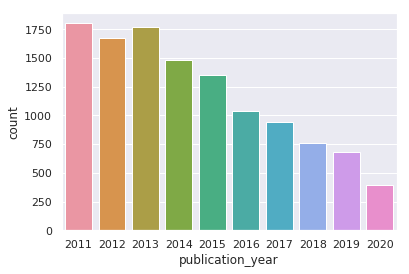

In [6]:
sns.countplot(df['publication_year'])

After cleaning, more recent data (2016-2020) were reduced than the older ones (2011-2013).
<br>
Why is the recent data more corrupted?? ***figure it out

# 1. Parse the data by year of its publication

Using groupby method, we'll gather all the abstracts of each year as one large string element.

In [7]:
abstracts_per_year = df.groupby('publication_year')['abstract'].sum()
abstracts_per_year

publication_year
2011    RPE65 is an abundantly expressed protein withi...
2012    Peripheral immune cells and brain microglia ex...
2013    erbb4 is a susceptibility gene for schizophren...
2014    Presynaptic kainate-type glutamate receptors (...
2015    Emerging evidence has indicated that the patho...
2016    Comprehending speech involves the rapid and op...
2017    Spinal cord injury (SCI) induces a centralized...
2018    Overreactivity and defensive behaviors in resp...
2019    In the retina of zebrafish, Müller glia have t...
2020    Neuronal progenitors in the developing forebra...
Name: abstract, dtype: object

In [12]:
# Check the length of the document per year

for i, val in enumerate(abstracts_per_year):
    vol_per_year = i+2011, len(val)
    print(f'Total length of the abstracts publicated in year {vol_per_year[0]} is {vol_per_year[1]}')

Total length of the abstracts publicated in year 2011 is 2715079
Total length of the abstracts publicated in year 2012 is 2510295
Total length of the abstracts publicated in year 2013 is 2662309
Total length of the abstracts publicated in year 2014 is 2255663
Total length of the abstracts publicated in year 2015 is 2427824
Total length of the abstracts publicated in year 2016 is 2256093
Total length of the abstracts publicated in year 2017 is 1119085
Total length of the abstracts publicated in year 2018 is 838517
Total length of the abstracts publicated in year 2019 is 750208
Total length of the abstracts publicated in year 2020 is 455919


# 2. Text normalization

Before creating a bag of words representation of each string, we first need to transform the text into a single canonical form.
<br>
To this end, I'll adopt following methods/techniques: <br>
    - prepare a list of tokens using *word_tokenizer*
    - lowercase all the tokens
    - keep alphanumeric tokens only
    - remove stopwords
    - extract lemmatized tokens using *WordNetLemmatizer*

In [13]:
# A function to extract the document from a specific year

def abstracts_from_year(num):
    for i, val in enumerate(abstracts_per_year):
        if i+2011 == num:
            return val

In [21]:
abstracts_from_year(2020)[:100]

'Neuronal progenitors in the developing forebrain undergo dynamic competence states to ensure timely '

In [22]:
# A function to get a list of word tokens (unigrams)
# Normalization techniques to apply: Lowercasing, Alphanumeric only, Remove stopwords, Lemmatization

def get_tokens_normalized(text: str):
    # Instantiate word tokenizer
    tokenized = word_tokenize(text)
    # str(text) is needed at the moment to force the unclean data to be accepted by this function

    # Get lowercased tokens using Tweet tokenizer
    tokens_list = [t.lower() for t in tokenized]
    
    # Retain alphanumeric words only
    alpha_only = [t for t in tokens_list if t.isalnum()]
    
    # Remove all stop words: no_stops
    stopwords_en = stopwords.words('english')
    no_stops = [t for t in alpha_only if t not in stopwords_en]
    
    # Lemmatize
    wordnet_lemmatizer = WordNetLemmatizer()
    lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]
    
    return lemmatized

Let's get an example of the output tokens:
    # 1. Extract a string element from year 2011-2020 by using the function 'abstracts_from_year'
    # 2. Get a list of normlized tokens using 'get_tokens_normalized'
    # 3. Print only the first 10 tokens as an example

In [29]:
tokens = {}
for year in range(2011, 2021):
    tokens[year] =  get_tokens_normalized(abstracts_from_year(year))[:10]
    
print(tokens)

{2011: ['rpe65', 'abundantly', 'expressed', 'protein', 'within', 'retinal', 'pigment', 'epithelium', 'rpe', 'eye'], 2012: ['peripheral', 'immune', 'cell', 'brain', 'microglia', 'exhibit', 'activated', 'phenotype', 'premanifest', 'huntington'], 2013: ['erbb4', 'susceptibility', 'gene', 'schizophrenia', 'erbb4', 'signal', 'hypothesized', 'function', 'number', 'cortical'], 2014: ['presynaptic', 'glutamate', 'receptor', 'kars', 'regulate', 'glutamate', 'release', 'probability', 'plasticity', 'various'], 2015: ['emerging', 'evidence', 'indicated', 'pathogenesis', 'neuropathic', 'pain', 'mediated', 'spinal', 'neural', 'plasticity'], 2016: ['comprehending', 'speech', 'involves', 'rapid', 'optimally', 'efficient', 'mapping', 'sound', 'meaning', 'influential'], 2017: ['spinal', 'cord', 'injury', 'sci', 'induces', 'centralized', 'fibrotic', 'scar', 'surrounded', 'reactive'], 2018: ['overreactivity', 'defensive', 'behavior', 'response', 'tactile', 'stimulus', 'common', 'symptom', 'autism', 'spect

The tokens look ok.

# 3. Text vector representation - Bag of Words

In [33]:
# Save the 'abstracts_per_year' series as a dataframe to fit and transform

df_per_year = pd.DataFrame(abstracts_per_year)
df_per_year

,abstract
publication_year,
2011,RPE65 is an abundantly expressed protein withi...
2012,Peripheral immune cells and brain microglia ex...
2013,erbb4 is a susceptibility gene for schizophren...
2014,Presynaptic kainate-type glutamate receptors (...
2015,Emerging evidence has indicated that the patho...
2016,Comprehending speech involves the rapid and op...
2017,Spinal cord injury (SCI) induces a centralized...
2018,Overreactivity and defensive behaviors in resp...
2019,"In the retina of zebrafish, Müller glia have t..."


In [64]:
from sklearn.feature_extraction.text import CountVectorizer

# Use 80 features
vectorizer80 = CountVectorizer(max_df=.9, max_features=80,
                               ngram_range=(1,2), tokenizer=get_tokens_normalized)

bag_of_words = vectorizer80.fit_transform(df_per_year.abstract)


# CountVectorizer results:
print('bow_size:',len(vectorizer80.vocabulary_))
print()

# Bow feature names as a list
print('Feature names of the bow vectors:')
print(vectorizer80.get_feature_names()[:80])

bow_size: 80

Feature names of the bow vectors:
['allele', 'ampars', 'arousal', 'blocker', 'ca', 'ca channel', 'case', 'cdk5', 'cea', 'cell body', 'circadian', 'clock', 'creb', 'da neuron', 'daily', 'data demonstrate', 'determinant', 'dmn', 'dna', 'dopamine neuron', 'drosophila', 'elegans', 'erk', 'ethanol', 'exocytosis', 'exogenous', 'extrasynaptic', 'f', 'facial', 'first time', 'fly', 'gaba receptor', 'gating', 'gaze', 'glucose', 'gnrh', 'hippocampal slice', 'identifying', 'inhibit', 'isoform', 'isoforms', 'k', 'kinetics', 'leptin', 'lfp', 'ligand', 'lipid', 'mecp2', 'mglur5', 'microtubule', 'mn', 'morphine', 'motor neuron', 'mutant mouse', 'na', 'nerve injury', 'nicotine', 'nsc', 'outer', 'outgrowth', 'pka', 'proinflammatory', 'promoter', 'protein synthesis', 'quality', 'r', 'rat hippocampal', 'regional', 'remyelination', 'residue', 'ribbon', 'scn', 'tolerance', 'transmitter', 'trpv1', 'vitro', 'vivo', 'weak', 'wm', 'μm']


In [65]:
counted = pd.DataFrame(data=bag_of_words.toarray(),
                       index=df_per_year.index,
                       columns=vectorizer80.get_feature_names())

counted

,allele,ampars,arousal,blocker,ca,ca channel,case,cdk5,cea,cell body,...,ribbon,scn,tolerance,transmitter,trpv1,vitro,vivo,weak,wm,μm
publication_year,,,,,,,,,,,,,,,,,,,,,
2011,43,55,19,37,337,44,35,15,11,25,...,32,34,31,29,70,182,358,46,59,37
2012,28,40,22,30,267,38,44,15,20,29,...,32,37,31,57,38,145,317,30,54,38
2013,13,34,23,34,282,21,56,15,26,31,...,28,27,14,37,49,136,337,32,43,45
2014,36,32,19,34,236,19,36,43,25,11,...,32,17,6,27,39,108,292,25,52,29
2015,30,17,24,18,316,25,34,35,10,18,...,26,18,24,21,22,141,263,37,44,27
2016,15,28,28,20,114,17,33,39,32,21,...,29,13,29,12,16,104,243,26,56,8
2017,0,5,28,7,5,0,22,4,23,7,...,12,7,12,6,1,1,18,11,48,13
2018,1,8,15,0,1,0,20,0,20,9,...,1,2,2,0,3,1,0,9,27,1
2019,0,0,15,2,4,0,18,2,0,4,...,8,0,3,5,11,0,0,8,7,1
